In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Netflix.csv")

TODO 
🔹 Genel Dağılımlar

    - [X] Type (Movie/TV Show) dağılımı nasıl?

    - [X] En çok içerik eklenen yıllar hangileri?

    - [X] En çok kullanılan rating nedir?

    - [X] Hangi country en fazla içeriğe sahip?

🔹 Süre ve İçerik Analizi

    - [X] Filmlerin ortalama duration süresi ne kadar?

    - [X] Dizilerin ortalama sezon sayısı ne kadar?

    - [X] Hangi yönetmen en fazla içeriğe sahip?

🔹 Kategorik Keşif

    - [X] En yaygın listed_in kategorileri neler?


🔹 Zaman Serisi & Trend

    - [X] Yıllara göre içerik sayısı nasıl değişmiş?

    - [X] Hangi türler (listed_in) zamanla popüler hale gelmiş?

🔹 Kesişimli Analizler

    - [ ] Type ve rating ilişkisi nedir? (örneğin: TV Shows genelde hangi rating'e sahip?)

    - [ ] Country ve listed_in kombinasyonu nasıl değişiyor? (ör: Hindistan'dan gelen içeriklerin çoğu hangi türde?)

    - [ ] Release_year ve duration arasında bir değişim var mı?


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Veri setindeki film ve dizi sayısının oranı

<Axes: xlabel='type', ylabel='Count'>

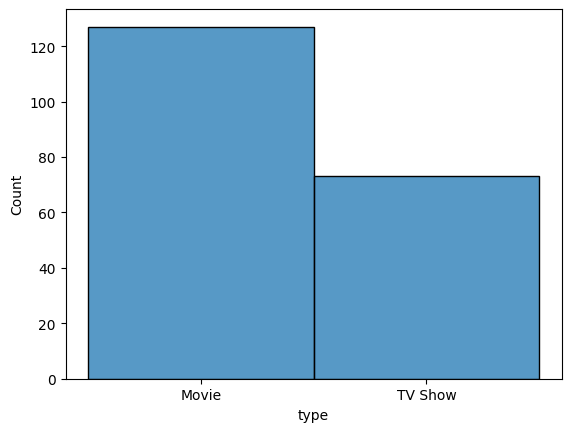

In [4]:
sns.histplot(df["type"])

# En çok içerik eklenen yıllar hangileri


In [5]:
df["date_added"].str.split("-").str.get(2).value_counts()
# tüm veriler 2021 yılına aitmiş

date_added
21    200
Name: count, dtype: int64

# En çok kullanılan rating nedir?

In [6]:
len(df["rating"].unique()) # toplamda 10 adet rating var

10

In [7]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G'], dtype=object)

In [8]:
df["rating"].value_counts()

rating
TV-MA    50
TV-14    34
PG-13    28
R        23
TV-PG    22
TV-Y7    14
PG       13
TV-Y     10
TV-G      5
G         1
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

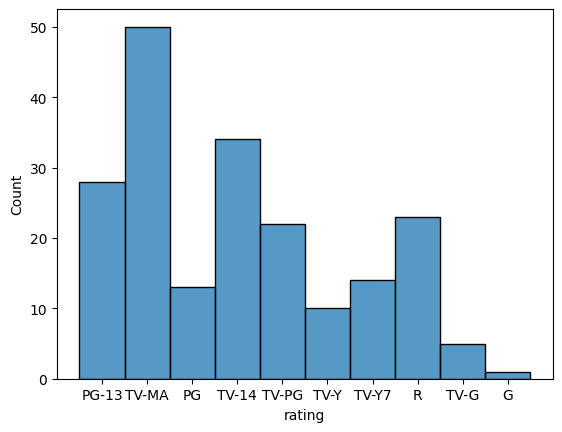

In [9]:
sns.histplot(df["rating"])

# Hangi Ülke en fazla içeriğe sahip?

In [10]:
top_5 = df['country'].value_counts().nlargest(5)
top_5_df = top_5.reset_index()
top_5_df.columns = ['country', 'count']
top_5_df

,country,count
0,United States,50
1,India,15
2,Japan,14
3,United Kingdom,5
4,Nigeria,4


<Axes: xlabel='country', ylabel='count'>

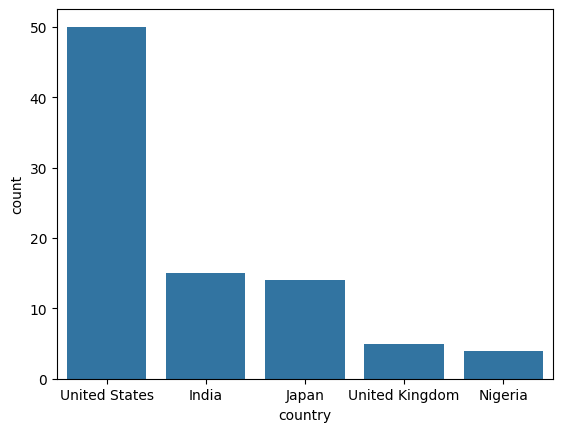

In [11]:
sns.barplot(data=top_5_df, x="country", y="count")

# Filmlerin ortalama süresi ne kadar?


In [12]:
df[df["type"] == "Movie"]["duration"].str.split(" ").str.get(0).astype(int).mean()

np.float64(106.2755905511811)

# dizilerin ortalama sezon sayısı

In [13]:
dizilerin_sezon_sayilari = df[df["type"] == "TV Show"]["duration"].apply(lambda x: 1 if x.split()[1] == "Season" else x.split()[0]).astype(int).sort_values(ascending=False)
dizilerin_sezon_sayilari

8      9
67     9
65     6
82     6
55     6
      ..
187    1
193    1
194    1
197    1
198    1
Name: duration, Length: 73, dtype: int64

In [14]:
dizilerin_sezon_sayilari.mean()

np.float64(2.0821917808219177)

# Hangi yönetmen en fazla içeriğe sahip?

In [15]:
df["director"].value_counts()

director
Toshiya Shinohara           4
Masahiko Murata             3
Hajime Kamegaki             2
Antoine Fuqua               2
Chapman Way, Maclain Way    2
                           ..
Taylor Sheridan             1
Sachin Yardi                1
Saurabh Kabra               1
Mark Waters                 1
Partho Mitra                1
Name: count, Length: 123, dtype: int64

# En Yaygın Türler (Genres)

In [16]:
genre = pd.DataFrame(df["listed_in"].str.split(",").sum(), columns=["genre"])
genre

,genre
0,Documentaries
1,International TV Shows
2,TV Dramas
3,TV Mysteries
4,Crime TV Shows
...,...
432,International TV Shows
433,TV Dramas
434,Comedies
435,Dramas


In [17]:
genre.value_counts()

genre                     
 International Movies         41
Action & Adventure            40
Comedies                      26
Dramas                        26
Kids' TV                      20
 Dramas                       19
International TV Shows        17
 TV Comedies                  16
 TV Dramas                    15
 Comedies                     15
 Romantic Movies              15
 International TV Shows       14
 Thrillers                    13
Children & Family Movies      13
 Anime Features               12
Documentaries                 12
Crime TV Shows                10
 Music & Musicals              7
Docuseries                     6
 Spanish-Language TV Shows     6
Reality TV                     6
 TV Action & Adventure         6
 Cult Movies                   5
 Romantic TV Shows             5
British TV Shows               5
Thrillers                      4
TV Comedies                    4
 Sports Movies                 4
 Sci-Fi & Fantasy              4
 Independent Mov

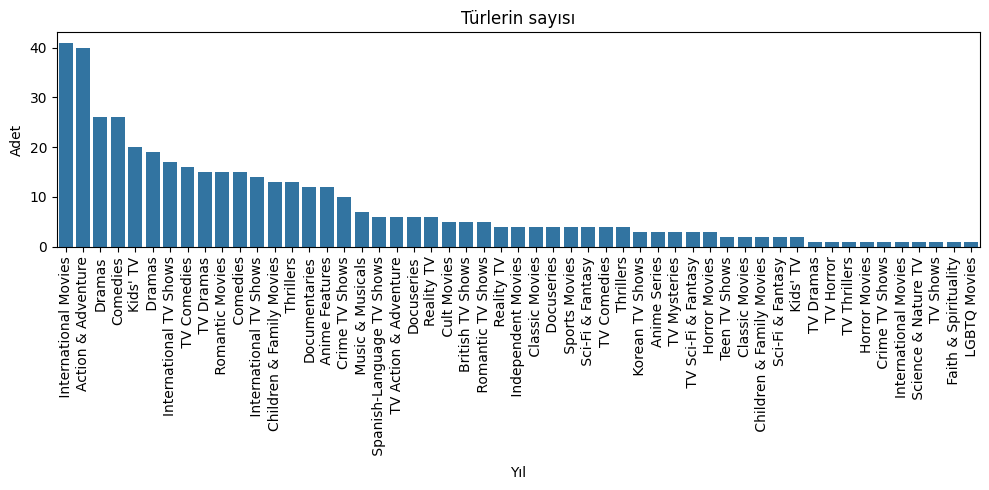

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=genre, x="genre", order = genre["genre"].value_counts().index)
plt.title("Türlerin sayısı")
plt.xlabel("Yıl")
plt.ylabel("Adet")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Yıllara göre içerik sayısı 

Toplam yıl sayısı: 41


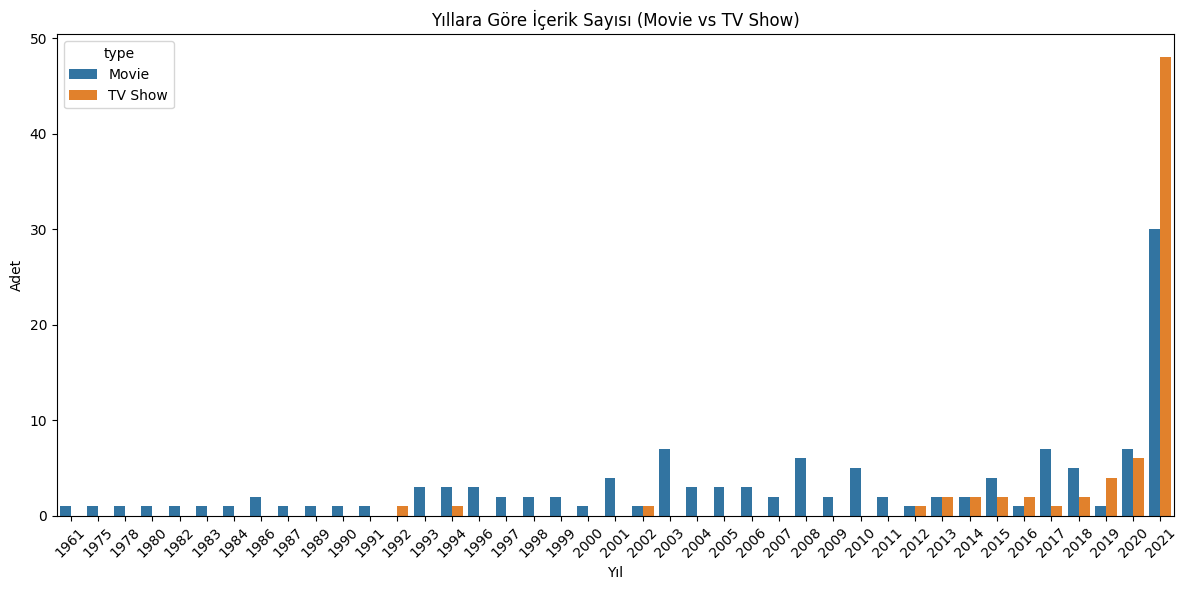

In [19]:
# Kaç yıl olduğunu göster
print("Toplam yıl sayısı:", df["release_year"].nunique())

# Yıllara göre içerik sayısı (Movie ve TV Show)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="release_year", hue="type")
plt.title("Yıllara Göre İçerik Sayısı (Movie vs TV Show)")
plt.xlabel("Yıl")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Yıllara göre tür popülerliği

In [21]:
df_cleaned = df.copy()
df_cleaned["genre"] = df_cleaned["listed_in"].str.split(",")
df_cleaned["genre"] = df_cleaned["genre"].apply(lambda x: [i.strip() for i in x])
df_exploded = df_cleaned.explode("genre")
df_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,s196,Movie,EMI: Liya Hai To Chukana Padega,Saurabh Kabra,"Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...",India,27-Aug-21,2008,TV-14,128 min,"Comedies, Dramas, International Movies",A bank hires an enigmatic and unorthodox debt ...,"[Comedies, Dramas, International Movies]"
196,s197,Movie,He's All That,Mark Waters,"Addison Rae, Tanner Buchanan, Rachael Leigh Co...",NaN,27-Aug-21,2021,TV-14,92 min,"Comedies, Romantic Movies",An influencer specializing in makeovers bets s...,"[Comedies, Romantic Movies]"
197,s198,TV Show,I Heart Arlo,NaN,"Michael J. Woodard, Mary Lambert, Jonathan Van...",NaN,27-Aug-21,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies",It's a whole new world for Arlo and his one-of...,"[Kids' TV, TV Comedies]"
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,27-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...,"[Crime TV Shows, International TV Shows, TV Dr..."


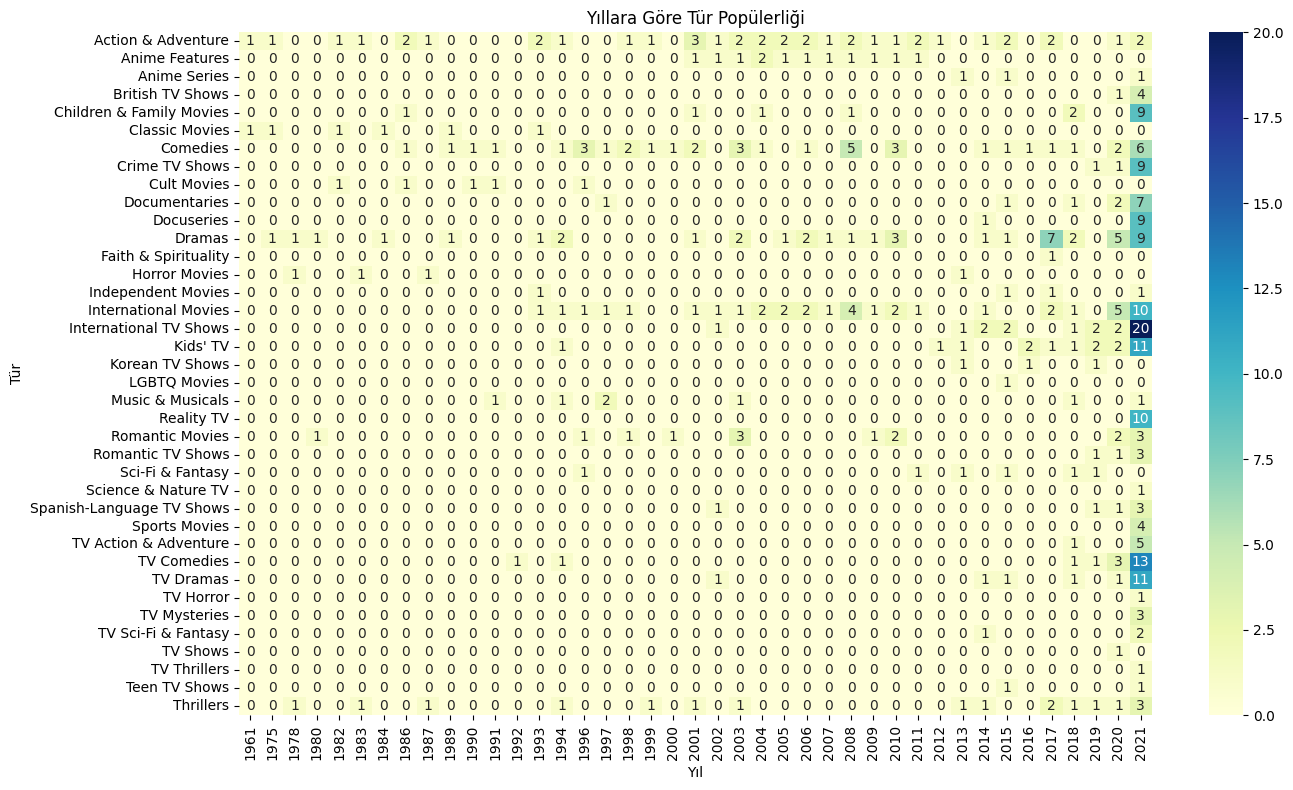

In [22]:
genre_year_counts = df_exploded.groupby(["release_year", "genre"], observed=True).size().reset_index(name="count")

pivot = genre_year_counts.pivot(index="genre", columns="release_year", values="count").fillna(0)

# Heatmap çizimi
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap="YlGnBu", annot=True)
plt.title("Yıllara Göre Tür Popülerliği")
plt.xlabel("Yıl")
plt.ylabel("Tür")
plt.tight_layout()
plt.show()
